In [1]:
import geopandas as gpd
import pandas as pd
import pyarrow
import plotly.express as px

In [2]:
data_directory = '../../../Data/PriorityPlacesData/'

In [3]:
gdf = gpd.read_file(data_directory + 'Lower_Layer_Super_Output_Areas_(December_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson')

In [4]:
df = pd.read_csv('../data/priority_places_v1_1_decile_domains_WGS.csv', index_col=0)

In [5]:
gdf = gdf.merge(df, right_on='geo_code', left_on='LSOA11CD', how='right', indicator=True)

In [9]:
gdf.head()

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,...,latitude,domain_supermarket_proximity,domain_supermarket_transport,domain_ecommerce_access,domain_socio_demographic,domain_nonsupermarket_proximity,domain_food_for_families,domain_fuel_poverty,combined,_merge
0,3437.0,E01003513,Newham 035D,Newham 035D,541939.0,181383.0,0.044134,51.51354,347542.158653,2906.958179,...,51.513348,6,9,10,9,8,2,2,8,both
1,3549.0,E01003630,Newham 021C,Newham 021C,539855.0,183533.0,0.014974,51.53338,117183.120544,1492.342676,...,51.533718,2,7,8,3,9,5,1,4,both
2,3537.0,E01003617,Newham 012B,Newham 012B,538957.0,184680.0,0.002488,51.54391,194091.068146,2223.640032,...,51.545061,10,9,10,1,10,2,1,10,both
3,3424.0,E01003497,Newham 034A,Newham 034A,538943.0,181938.0,0.001206,51.51928,741702.036026,4160.934978,...,51.520488,8,7,8,3,9,6,1,5,both
4,3426.0,E01003499,Newham 030A,Newham 030A,540389.0,182453.0,0.022238,51.52355,136165.579758,1506.514265,...,51.523869,10,10,1,1,9,7,1,7,both


<AxesSubplot:>

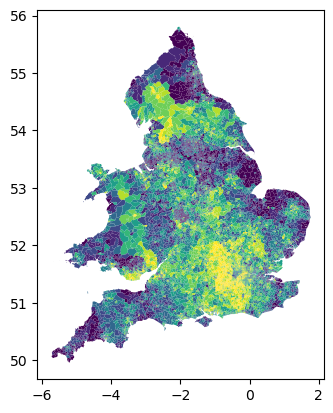

In [17]:
gdf.plot('combined')

In [15]:
gdf.to_parquet('test.parquet', index=False, compression='brotli')

In [68]:
gdf = gpd.read_parquet('test.parquet')
gdf = gdf.dropna()

In [ ]:
fig = px.choropleth_mapbox(gdf, 
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           color='combined', 
                           center={'lat': 53.8067, 'lon': -1.5550})
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})
fig.update_geos(fitbounds="locations", visible=True)
fig.show()

In [60]:
gdf

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,...,latitude,domain_supermarket_proximity,domain_supermarket_transport,domain_ecommerce_access,domain_socio_demographic,domain_nonsupermarket_proximity,domain_food_for_families,domain_fuel_poverty,combined,_merge
0,3437.0,E01003513,Newham 035D,Newham 035D,541939.0,181383.0,0.044134,51.51354,347542.158653,2906.958179,...,51.513348,6,9,10,9,8,2,2,8,both
1,3549.0,E01003630,Newham 021C,Newham 021C,539855.0,183533.0,0.014974,51.53338,117183.120544,1492.342676,...,51.533718,2,7,8,3,9,5,1,4,both
2,3537.0,E01003617,Newham 012B,Newham 012B,538957.0,184680.0,0.002488,51.54391,194091.068146,2223.640032,...,51.545061,10,9,10,1,10,2,1,10,both
3,3424.0,E01003497,Newham 034A,Newham 034A,538943.0,181938.0,0.001206,51.51928,741702.036026,4160.934978,...,51.520488,8,7,8,3,9,6,1,5,both
4,3426.0,E01003499,Newham 030A,Newham 030A,540389.0,182453.0,0.022238,51.52355,136165.579758,1506.514265,...,51.523869,10,10,1,1,9,7,1,7,both
5,3522.0,E01003598,Newham 021A,Newham 021A,540249.0,183623.0,0.020686,51.53410,66515.982857,1062.539731,...,51.533765,3,10,8,4,10,6,1,9,both
6,3450.0,E01003526,Newham 018E,Newham 018E,542439.0,183342.0,0.052125,51.53102,64483.653191,1301.984939,...,51.531154,10,6,8,5,10,7,1,9,both
7,3474.0,E01003550,Newham 001D,Newham 001D,540299.0,185912.0,0.022318,51.55465,129125.931526,1447.100328,...,51.554354,7,8,7,4,9,6,1,5,both
8,3406.0,E01003479,Newham 035A,Newham 035A,542466.0,181238.0,0.051665,51.51211,280925.333168,2056.344949,...,51.511885,7,6,7,7,5,2,1,3,both
9,3532.0,E01003608,Newham 028D,Newham 028D,541192.0,182720.0,0.033911,51.52575,49583.236320,937.506054,...,51.525840,8,9,7,6,10,6,1,8,both


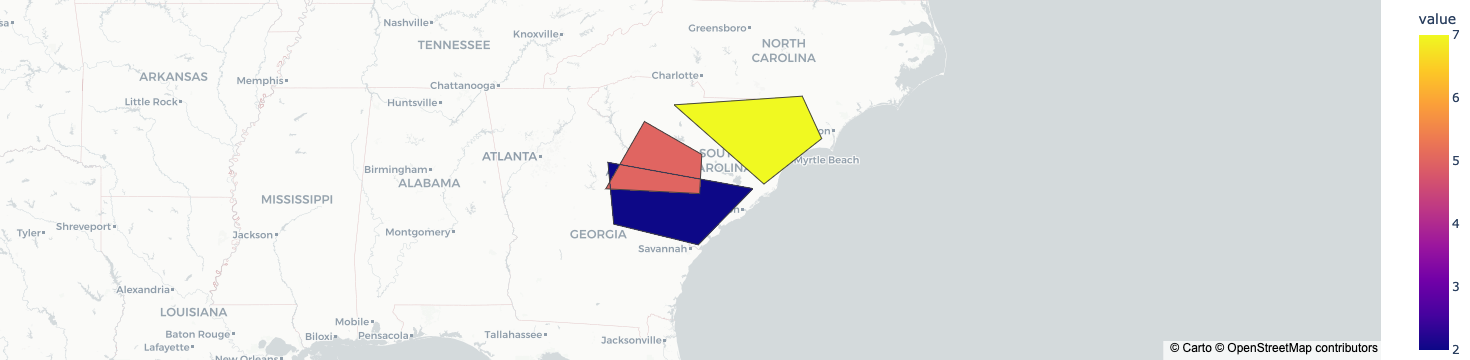

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-82.899205, 33.653817],
      [-82.7715, 32.516301],
      [-80.914171, 32.133138],
      [-79.710831, 33.171969],
      [-82.899205, 33.653817]]]},
   'properties': {'unique_id': 'AZ_1', 'name': 'shape A'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-80.883651, 33.080687],
      [-80.835692, 33.797411],
      [-82.095711, 34.396734],
      [-82.945897, 33.16832],
      [-80.883651, 33.080687]]]},
   'properties': {'unique_id': 'BV_2', 'name': 'shape B'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-79.471035, 33.255865],
      [-78.202296, 34.086771],
      [-78.629569, 34.855954],
      [-81.446082, 34.698384],
      [-79.471035, 33.255865]]]},
   'properties': {'unique_id': 'CD_3', 'name': 'shape C'}}]}

In [43]:
df = pd.DataFrame({'letter':['A','B','C'],'name':['AZ_1','BV_2','CD_3'],'value':[2,5,7]})

gj = {
    'type': 'FeatureCollection',
    'features': [
        {
            'type': 'Feature',
            'geometry': {
                'type': 'Polygon',
                'coordinates':[[
                    [-82.899205,33.653817],
                    [-82.771500,32.516301],
                    [-80.914171,32.133138],
                    [-79.710831,33.171969],
                    [-82.899205,33.653817]
                ]]
            },
            'properties': {'unique_id': 'AZ_1', 'name': 'shape A'}
        },
                {
            'type': 'Feature',
            'geometry': {
                'type': 'Polygon',
                'coordinates':[[
                    [-80.883651,33.080687],
                    [-80.835692,33.797411],
                    [-82.095711,34.396734],
                    [-82.945897,33.168320],
                    [-80.883651,33.080687]
                ]]
            },
            'properties': {'unique_id': 'BV_2', 'name': 'shape B'}
        },
                {
            'type': 'Feature',
            'geometry': {
                'type': 'Polygon',
                'coordinates':[[
                    [-79.471035,33.255865],
                    [-78.202296,34.086771],
                    [-78.629569,34.855954],
                    [-81.446082,34.698384],
                    [-79.471035,33.255865]
                ]]
            },
            'properties': {'unique_id': 'CD_3', 'name': 'shape C'}
        },
    ]
}

fig = px.choropleth_mapbox(df, geojson=gj,color=df.value,
                           locations=df.name, featureidkey="properties.unique_id",
                           center={"lat": 33.33012299999999, "lon": -81.08463033333332},
                           mapbox_style="carto-positron", zoom=5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [44]:
gj

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-82.899205, 33.653817],
      [-82.7715, 32.516301],
      [-80.914171, 32.133138],
      [-79.710831, 33.171969],
      [-82.899205, 33.653817]]]},
   'properties': {'unique_id': 'AZ_1', 'name': 'shape A'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-80.883651, 33.080687],
      [-80.835692, 33.797411],
      [-82.095711, 34.396734],
      [-82.945897, 33.16832],
      [-80.883651, 33.080687]]]},
   'properties': {'unique_id': 'BV_2', 'name': 'shape B'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-79.471035, 33.255865],
      [-78.202296, 34.086771],
      [-78.629569, 34.855954],
      [-81.446082, 34.698384],
      [-79.471035, 33.255865]]]},
   'properties': {'unique_id': 'CD_3', 'name': 'shape C'}}]}